## Import Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

## Data Collection:

In [3]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


## Data Understanding: 

In [3]:
data.shape

(1436, 38)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

### Feature Transformation:

In [5]:
toyota = pd.concat([data.iloc[:,2:4],data.iloc[:,6],data.iloc[:,8],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
toyota.shape

(1436, 9)

In [7]:
#Feature Renaming
toyota.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1,inplace=True)
toyota

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
toyota[toyota.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
toyota=toyota.drop_duplicates().reset_index(drop=True)
toyota

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [10]:
toyota.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [11]:
toyota.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
CC        int64
Doors     int64
Gears     int64
QT        int64
Weight    int64
dtype: object

In [12]:
toyota.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Correlation Matrix:

In [13]:
toyota_corr=toyota.corr()
toyota_corr

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

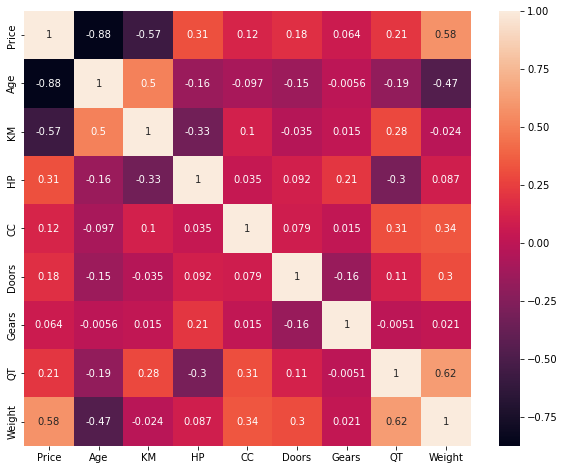

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(toyota_corr,annot=True)

## Linearity Check:Scatterplot between variables:

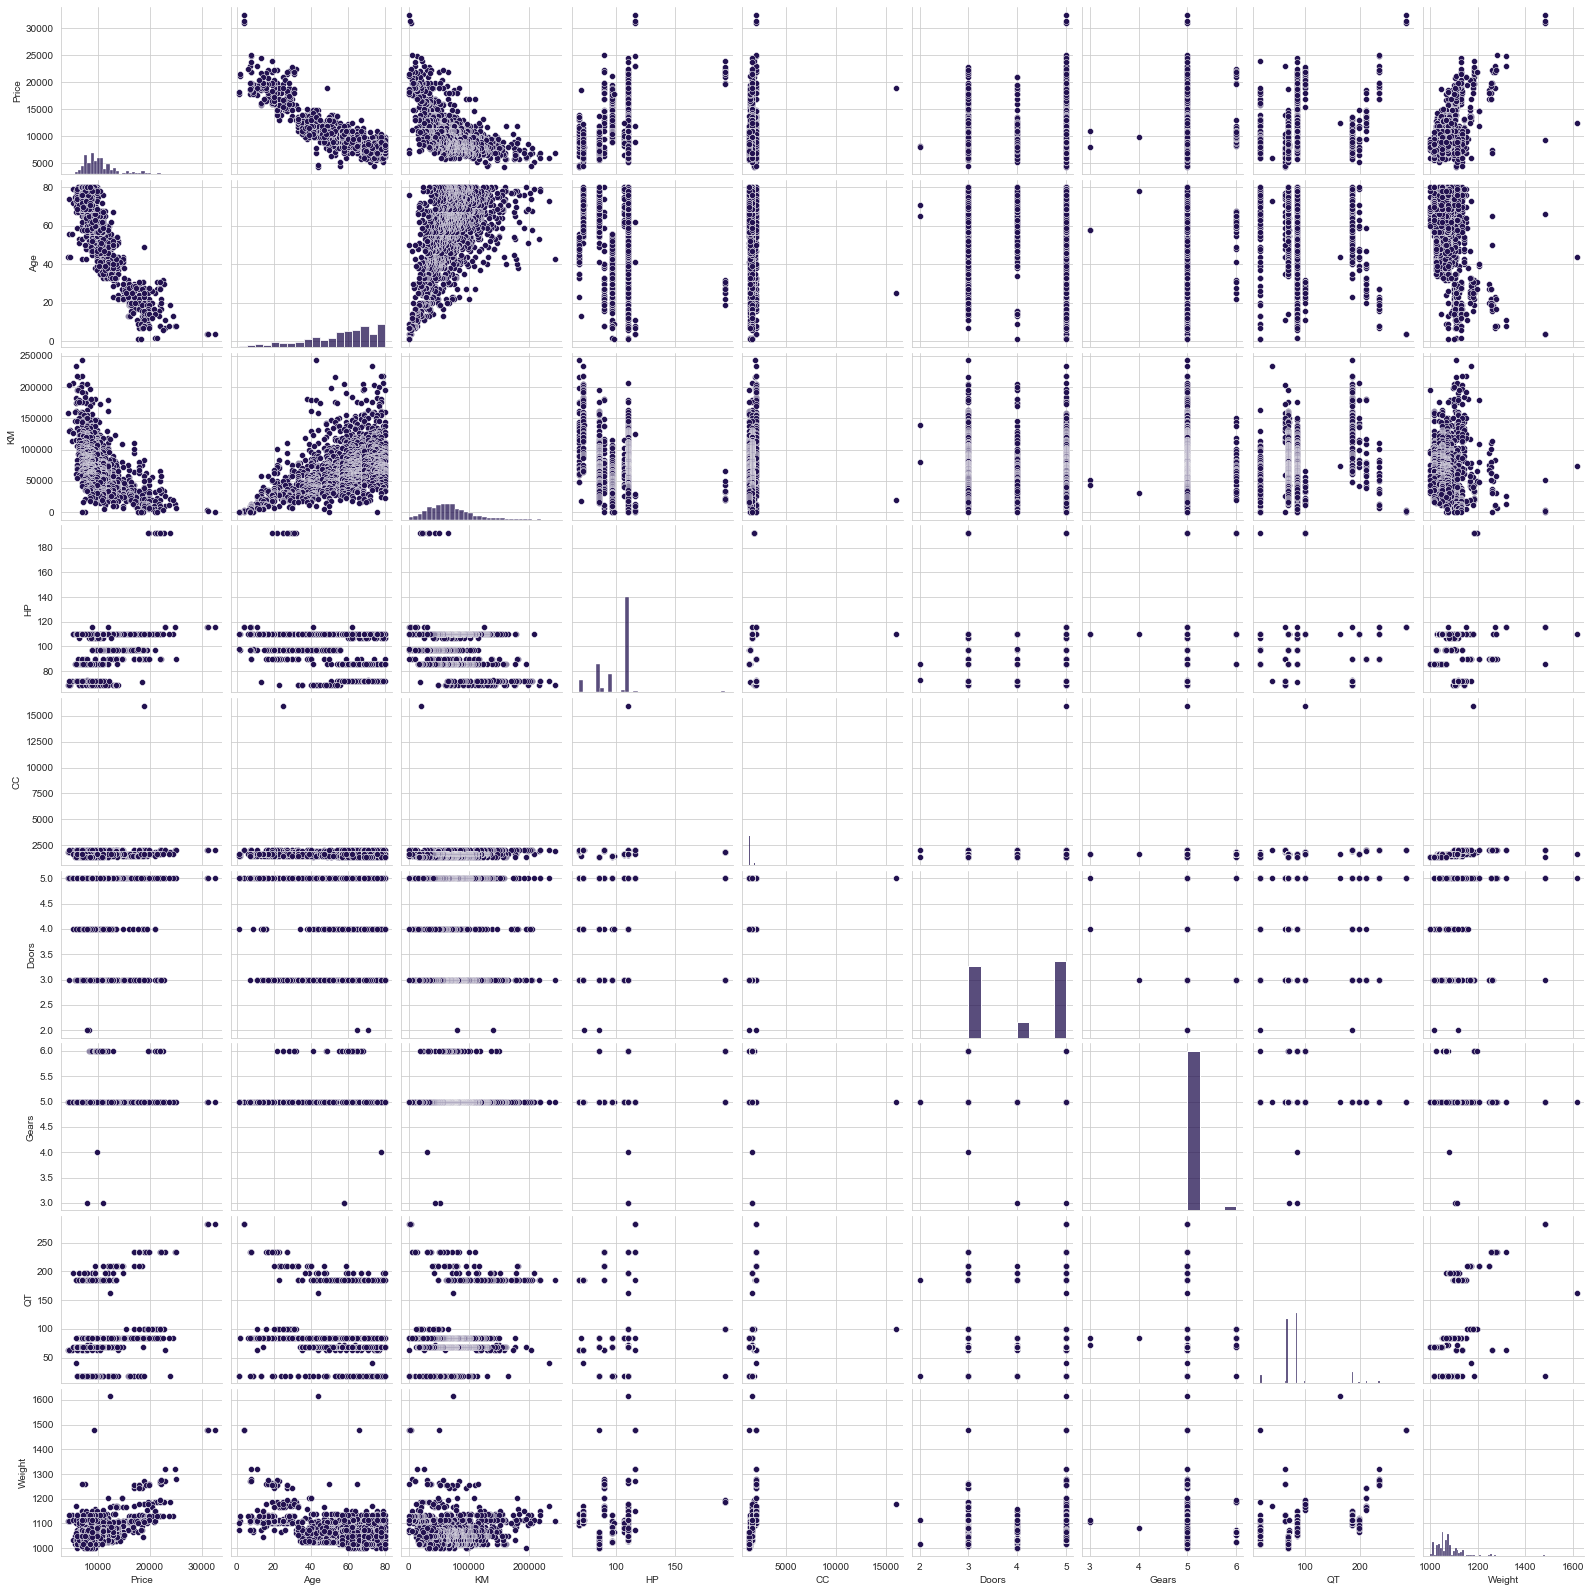

In [15]:
sns.set_palette('magma')
sns.set_style('whitegrid')
sns.pairplot(toyota)

## Model Building || Model Training:

In [16]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota).fit()
model

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:49:36   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [19]:
model.tvalues,model.pvalues.round(5)

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [20]:
model.rsquared,model.aic

(0.8625200256947, 24750.407207346932)

### Building SLR and MLR for insignificant features 'CC' and 'Doors'
### Also Finding their t-values and p-values:

In [21]:
slr_c=smf.ols('Price~CC',data=toyota).fit()
slr_c

In [22]:
slr_c.tvalues,slr_c.pvalues.round(8)

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    0.000000
 CC           0.000002
 dtype: float64)

In [23]:
slr_d=smf.ols('Price~Doors',data=toyota).fit()
slr_d

In [24]:
slr_d.tvalues,slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [25]:
mlr_cd=smf.ols('Price~CC+Doors',data=toyota).fit()
mlr_cd

In [26]:
mlr_cd.tvalues,mlr_cd.pvalues.round(5)

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    0.00000
 CC           0.00002
 Doors        0.00000
 dtype: float64)

## Model Validation Techniques:

## 1. Multicollinearity Test:

In [27]:
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_Age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_Age=1/(1-rsq_Age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_Doors=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_Weight=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

#storing VIF values in dataframe:
d1={'variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
   'VIF':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
vif_df=pd.DataFrame(d1)
vif_df

,variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


#### No variable has VIF>20, No Multi Collinearity, hence considering all varaibles in Regression equation.

## 2: Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

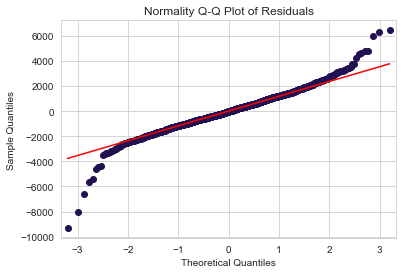

In [28]:
sm.qqplot(model.resid,line='q')
plt.title('Normality Q-Q Plot of Residuals')
plt.show()

In [29]:
list[np.where(model.resid>6000)]

list[array([109, 146, 522], dtype=int64)]

In [30]:
list[np.where(model.resid<-6000)]

list[array([220, 600, 959], dtype=int64)]

## Test for Homoscedasticity (plotting model's standardized fitted values vs standardized residual values) 

In [31]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std() 

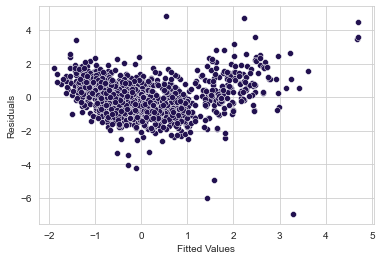

In [32]:
sns.scatterplot(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

## Residual Vs Regressors

### Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
### using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


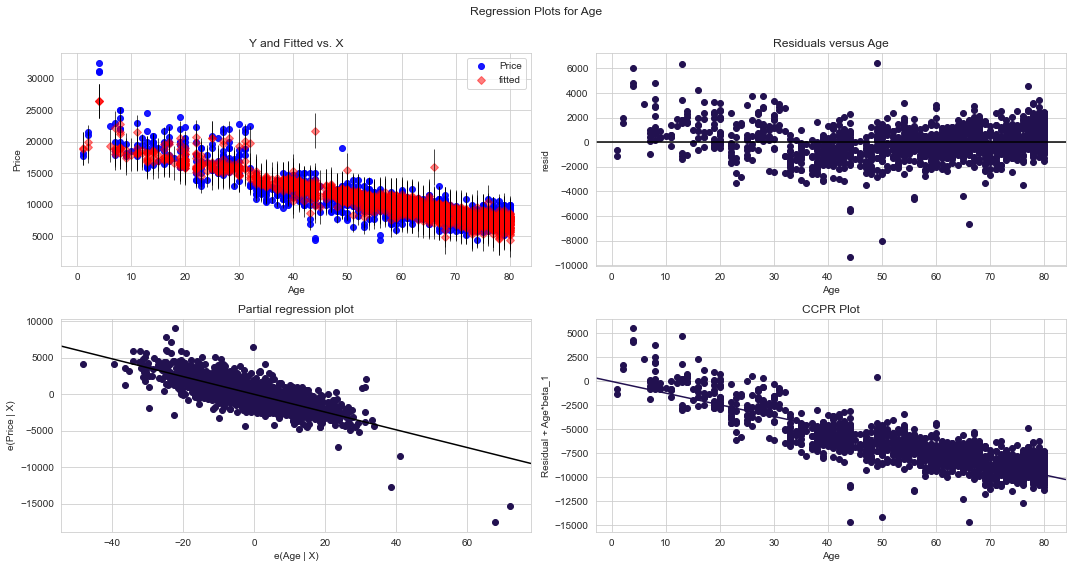

In [33]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


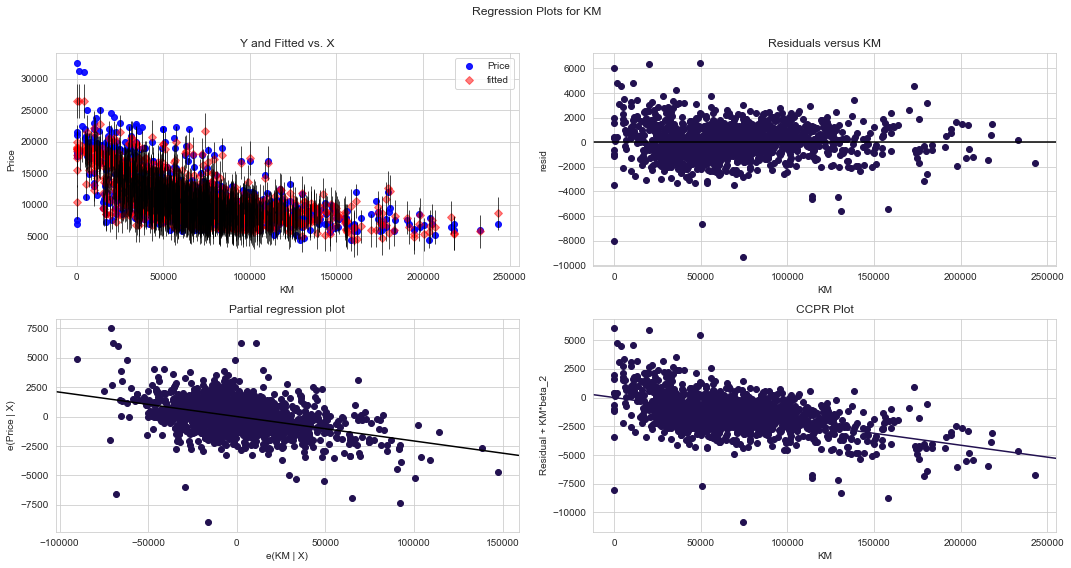

In [34]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


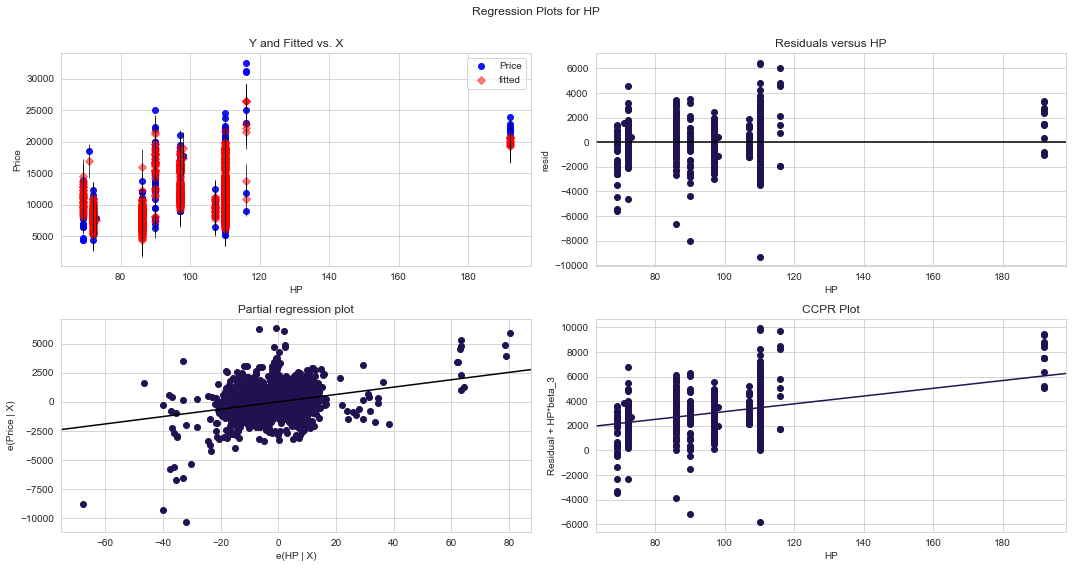

In [35]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


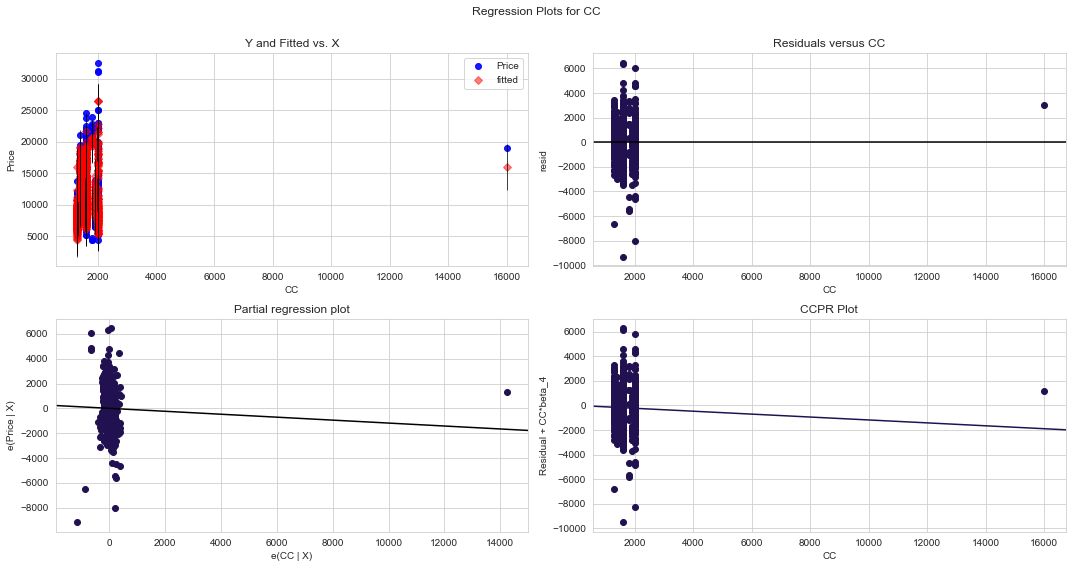

In [36]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


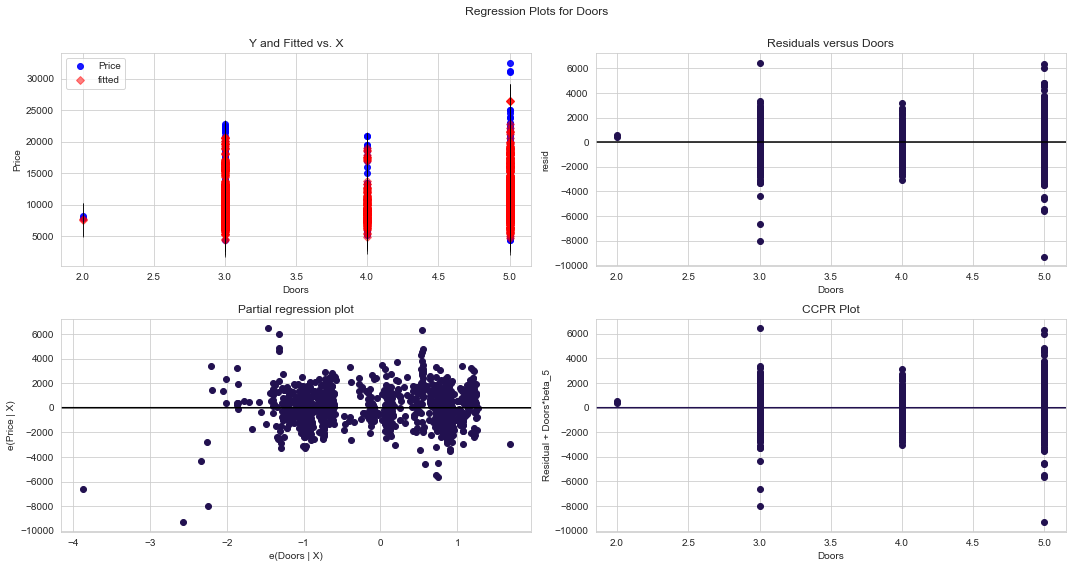

In [37]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


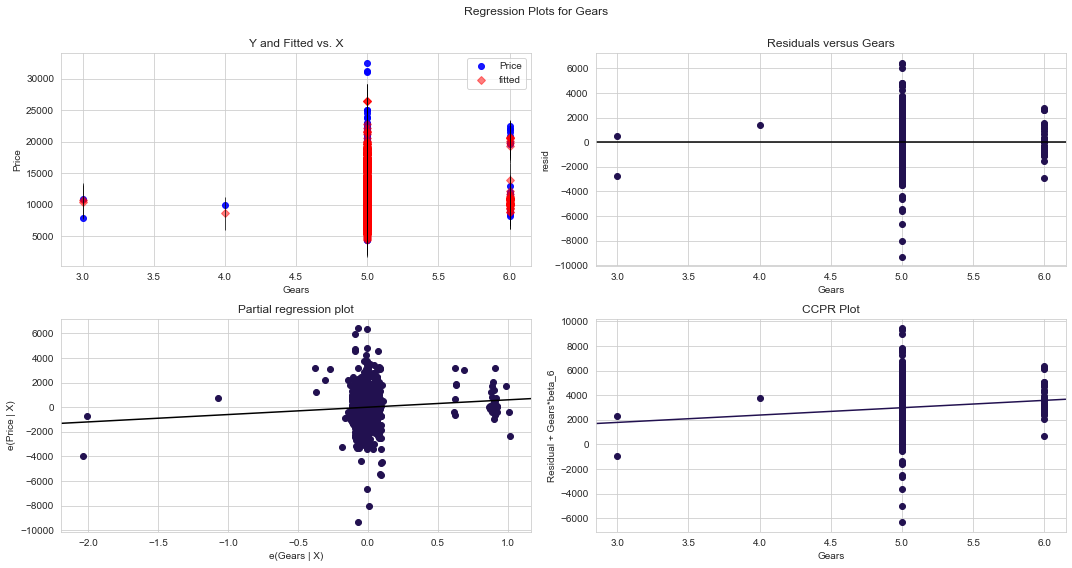

In [38]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


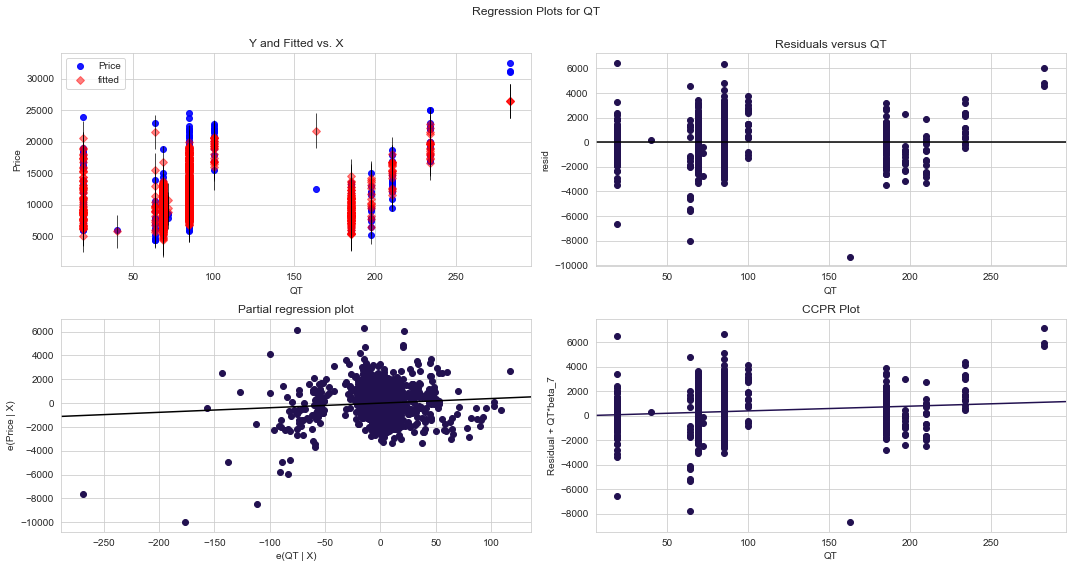

In [39]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


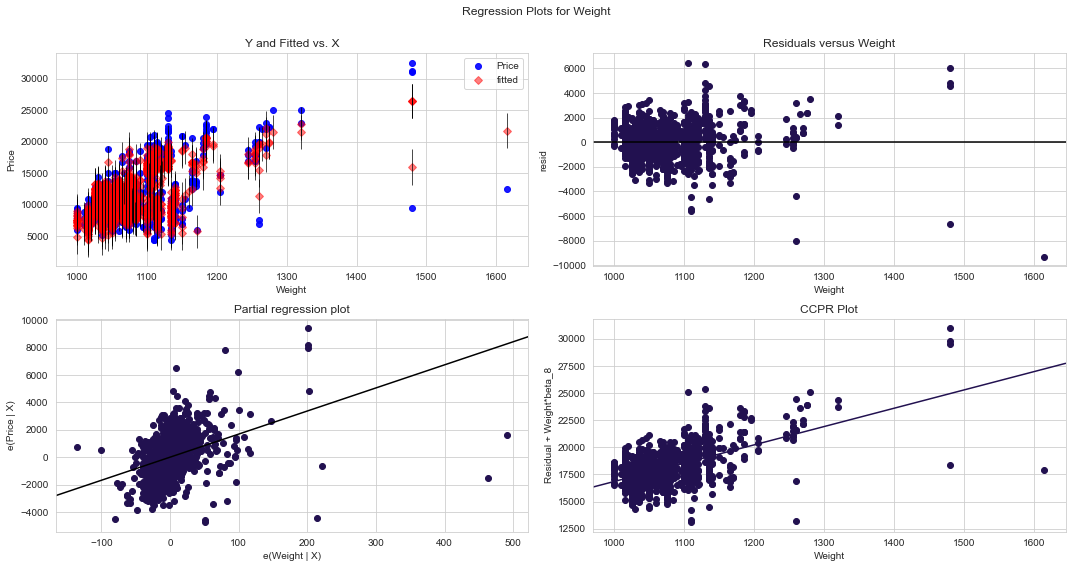

In [40]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [41]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance

In [42]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [43]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

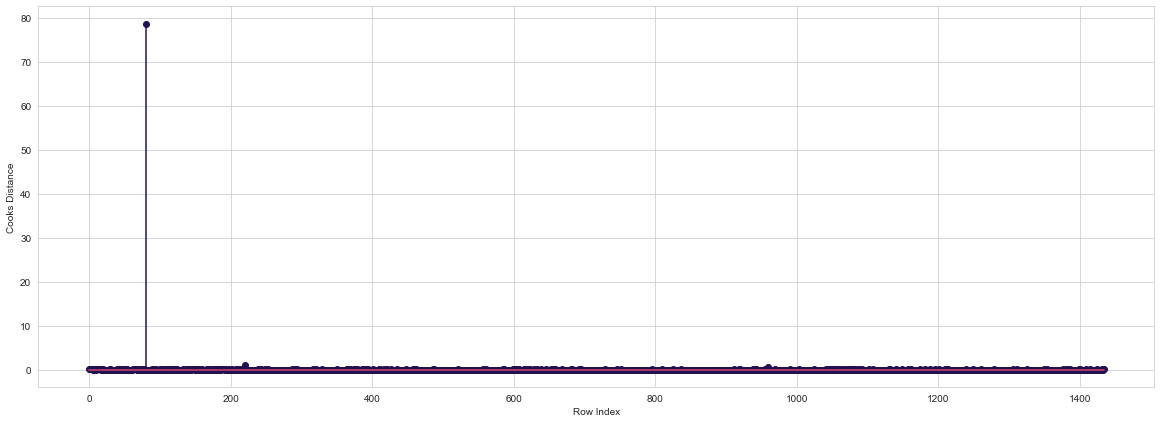

In [44]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

## High Influence points

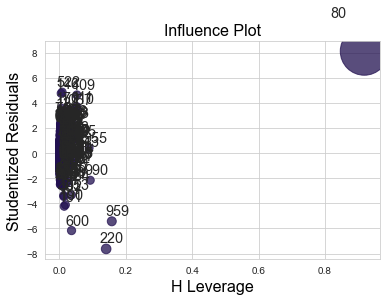

In [46]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [47]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k = toyota.shape[1]
n = toyota.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

In [48]:
toyota[toyota.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the model:

In [49]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyota2=toyota.drop(toyota.index[[80]],axis=0).reset_index(drop=True)
toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Again Build the Model:

In [50]:
model2=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota2).fit()
model2

In [51]:
model2.rsquared

0.8681163912634053

## Again Model Deletion Diagnostic:

In [52]:
model_influence_2=model2.get_influence()
(c_2,_)=model_influence_2.cooks_distance

In [53]:
c_2

array([6.74590070e-03, 3.61405392e-03, 4.90156911e-03, ...,
       3.65590981e-06, 9.10404094e-04, 9.70018332e-03])

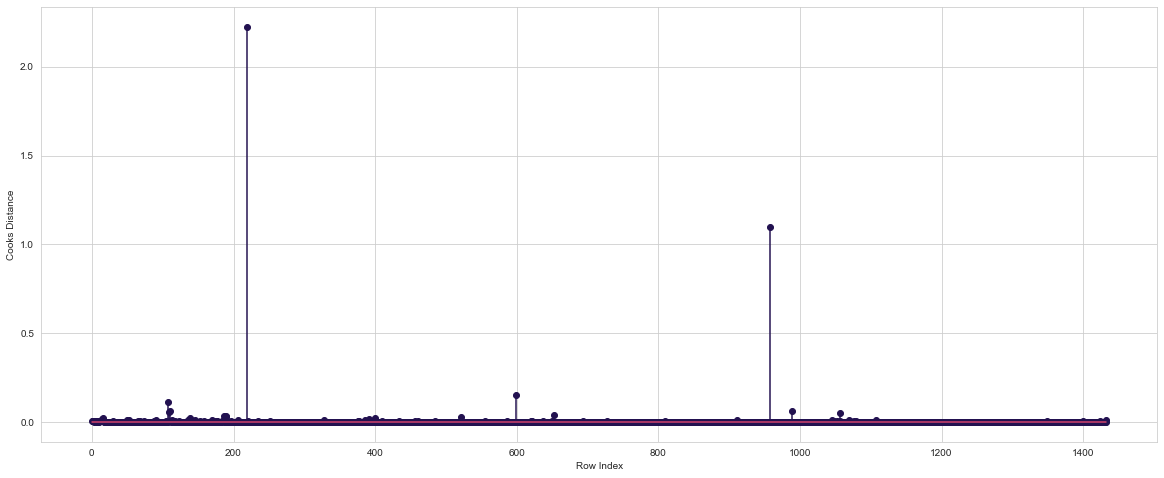

In [54]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(toyota2)),np.round(c_2,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
#index of the data points where c is more than .5
(np.argmax(c_2),np.max(c_2))

(219, 2.2253513655270813)

In [56]:
#Drop 219th observation and reassign the row number (reset_index(drop=True))
toyota3=toyota2.drop(toyota2.index[[219]],axis=0).reset_index(drop=True)
toyota3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


## Again Build the Model:

In [57]:
model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota3).fit()
model3

In [58]:
model3.rsquared

0.8765926307402282

## Again Model Deletion Diagnostic:

In [59]:
model_influence_3=model3.get_influence()
(c_3,_)=model_influence_3.cooks_distance

In [60]:
c_3

array([6.93624492e-03, 3.71406676e-03, 5.00484600e-03, ...,
       3.96836748e-06, 9.68186346e-04, 1.26195368e-02])

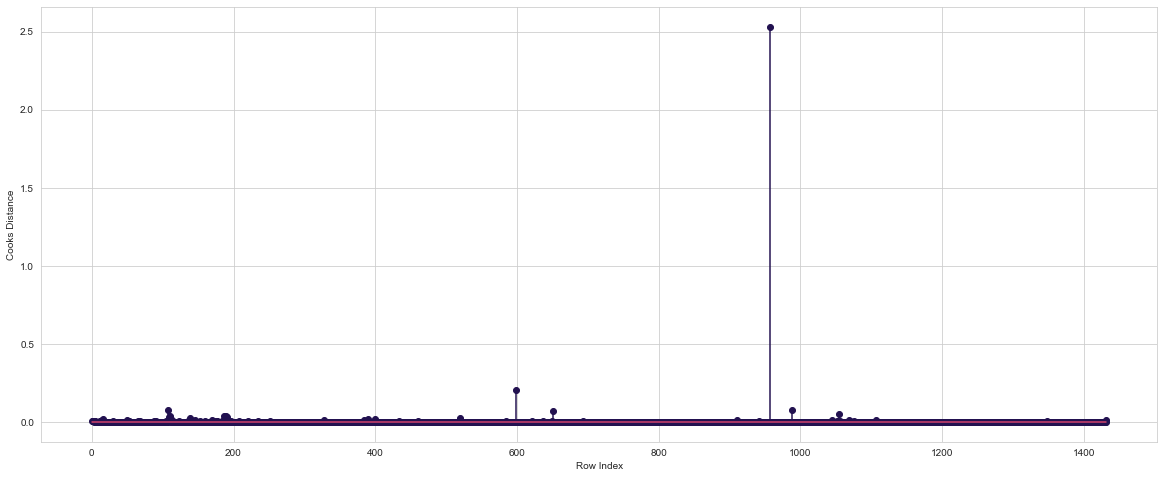

In [61]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(toyota3)),np.round(c_3,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
#index of the data points where c is more than .5
(np.argmax(c_3),np.max(c_3))

(957, 2.530779623276654)

In [63]:
#Drop 957th observation and reassign the row number (reset_index(drop=True))
toyota4=toyota3.drop(toyota3.index[[957]],axis=0).reset_index(drop=True)
toyota4

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


## Build the Final Model:

In [64]:
model4=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota4).fit()
model4

## Final Model Deletion Diagnostic:

In [65]:
model_influence_4=model4.get_influence()
(c_4,_)=model_influence_4.cooks_distance

In [66]:
c_4

array([6.82389815e-03, 3.57552355e-03, 4.84841789e-03, ...,
       1.03806619e-05, 1.10039755e-03, 1.82165409e-02])

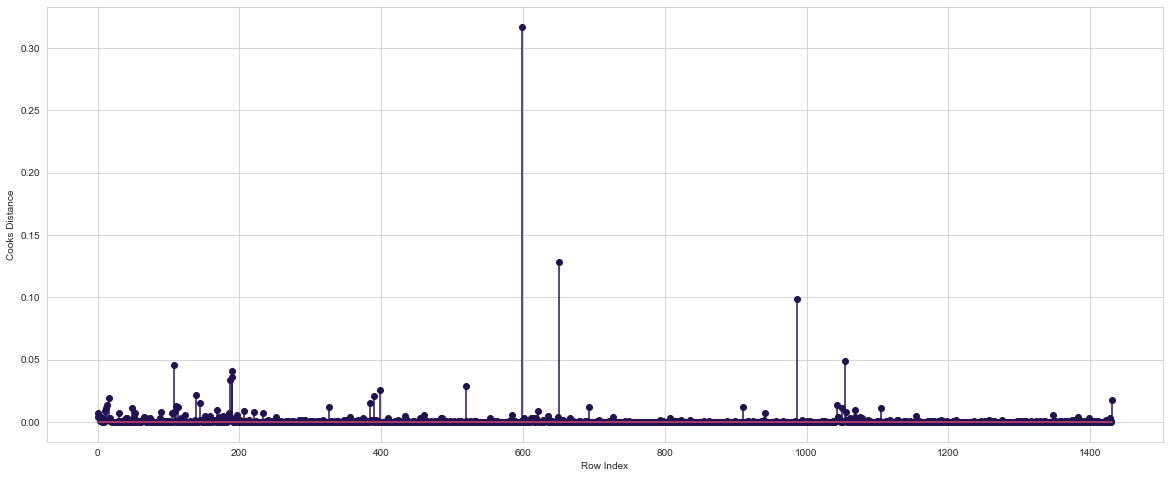

In [67]:
plt.figure(figsize=(20,8))
plt.stem(np.arange(len(toyota4)),np.round(c_4,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [68]:
model4.rsquared,model4.aic

(0.8839684606741538, 24453.23573612724)

## Model Prediction:

In [69]:
#sample data
new_data=pd.DataFrame({'Age':16,'KM':54000,'HP':95,'CC':1350,'Doors':4,'Gears':4,'QT':72,'Weight':1002},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,16,54000,95,1350,4,4,72,1002


In [70]:
model4.predict(new_data)

0    13350.054154
dtype: float64

In [71]:
pred_model=model4.predict(toyota4)
pred_model

0       16326.634426
1       15886.220972
2       16304.093367
3       15973.237208
4       15839.043084
            ...     
1427     9114.821644
1428     8499.169594
1429     8644.902871
1430     8758.662855
1431    10638.570082
Length: 1432, dtype: float64

## ========================================================================